# Regresión lineal: predecir los gastos médicos de pacientes
---

Para este ejercicio utilizaremos los datos presentados en [este](https://www.kaggle.com/mirichoi0218/insurance) dataset de Kaggle en el cual se presentan datos de seguros médicos. 


## Descarga e instalación de librerías

Lo primero que se hará es descargar la librería **[regressors](https://pypi.org/project/regressors/)** que ayudará a hacer un análisis más profundo sobre la regresión lineal.

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from regressors import stats# pip install setuptools==58  por lo que esta en una version adelante
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
sns.set(context='notebook')

## Descargando los datos
Descarguemos los datos y veamos cómo se ven.

In [4]:
df = pd.read_csv('./data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Analizando los datos
Se observará cómo se distribuyen los datos de la variable a predecir.

(1338, 7)


<AxesSubplot:>

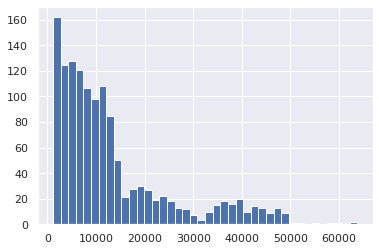

In [12]:
print(df.shape)
df.charges.hist(bins=40)

Algo que analizar, según este gráfico, es entender qué está pasando con los datos arriba de los 50,000. Parece haber muy pocos datos de este lado.

In [15]:
print(df[df.charges>50000])
df = df[df.charges<50000]

      age     sex     bmi  children smoker     region      charges
34     28    male  36.400         1    yes  southwest  51194.55914
543    54  female  47.410         0    yes  southeast  63770.42801
577    31  female  38.095         1    yes  northeast  58571.07448
819    33  female  35.530         0    yes  northwest  55135.40209
1146   60    male  32.800         0    yes  southwest  52590.82939
1230   52    male  34.485         3    yes  northwest  60021.39897
1300   45    male  30.360         0    yes  southeast  62592.87309


En este caso, al ser pocos datos (6 de 1338), eliminaremos estos datos atípicos. A modo didáctico producen más ruido en la predicción que se está intentando hacer en este ejercicio. 

Sin embargo es importante aclarar que **NO SE DEBEN ELIMINAR** datos atípicos sin antes conocer a alguien que conozca o sea experto en los datos para que pueda guiarnos mejor sobre ellos.

## Viendo correlaciones
Ahora entendamos nuestros datos, viendo cómo se distribuyen y correlacionan. 

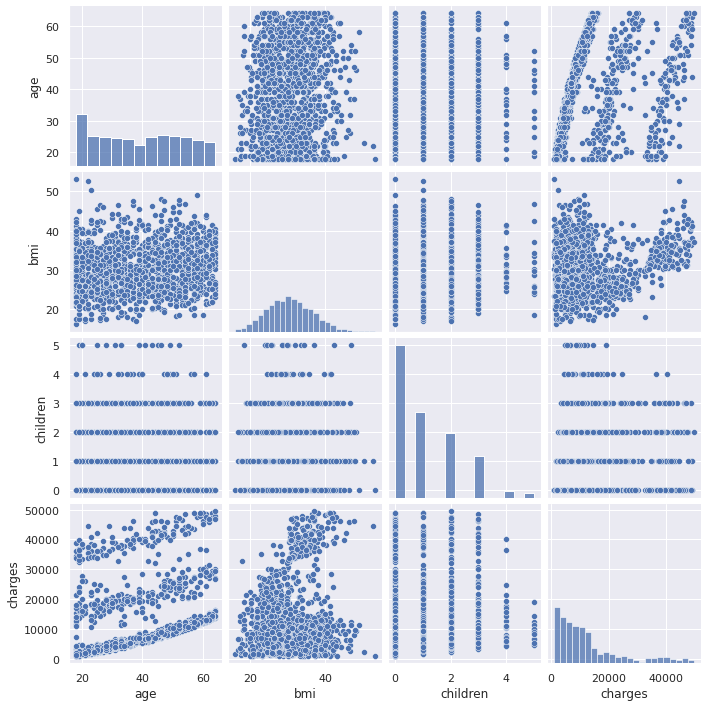

In [17]:
sns.pairplot(df, height=2.5)
plt.show()

Puntos interesantes a ver:

- Hay 3 grupos de personas diferentes que se clasifican en edad / cargos, esto puede ser un punto a analizar después.

En general los valores se distribuyen de manera esperada. Con valores extremos en el caso de los cargos, sin embargo esto es de esperarse pues los cargos en los hospitales pueden variar mucho por quedarse un día más en el hospital o incluso por procedimientos extras.

- Parece que los datos están limpios, la variable de índice de masa corporal se distribuye de manera normal o gausiana, lo cual sería esperado en un índice de este tipo.

<AxesSubplot:>

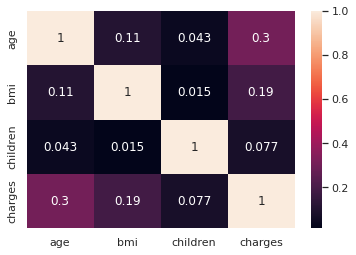

In [21]:
numeric_cols = ['age', 'bmi', 'children', 'charges']
cm = np.corrcoef(df[numeric_cols].values.T)
sns.heatmap(cm, annot=True, yticklabels=numeric_cols, xticklabels=numeric_cols)

## Utilizando las demás variables
Las demás variables son variables categoricas, sexo, fumador, región. Para poder utilizarlas utilizaremos la función get_dummies de pandas. 

Ahora la verás en acción

In [24]:
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


<AxesSubplot:>

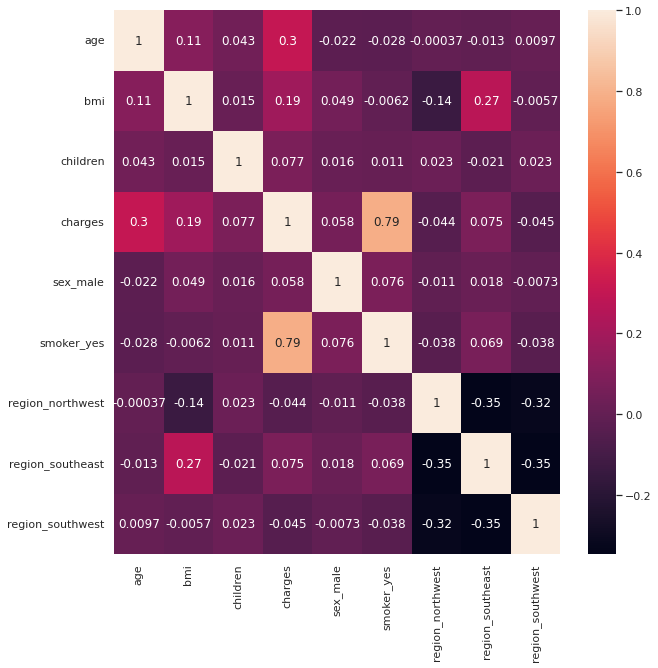

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

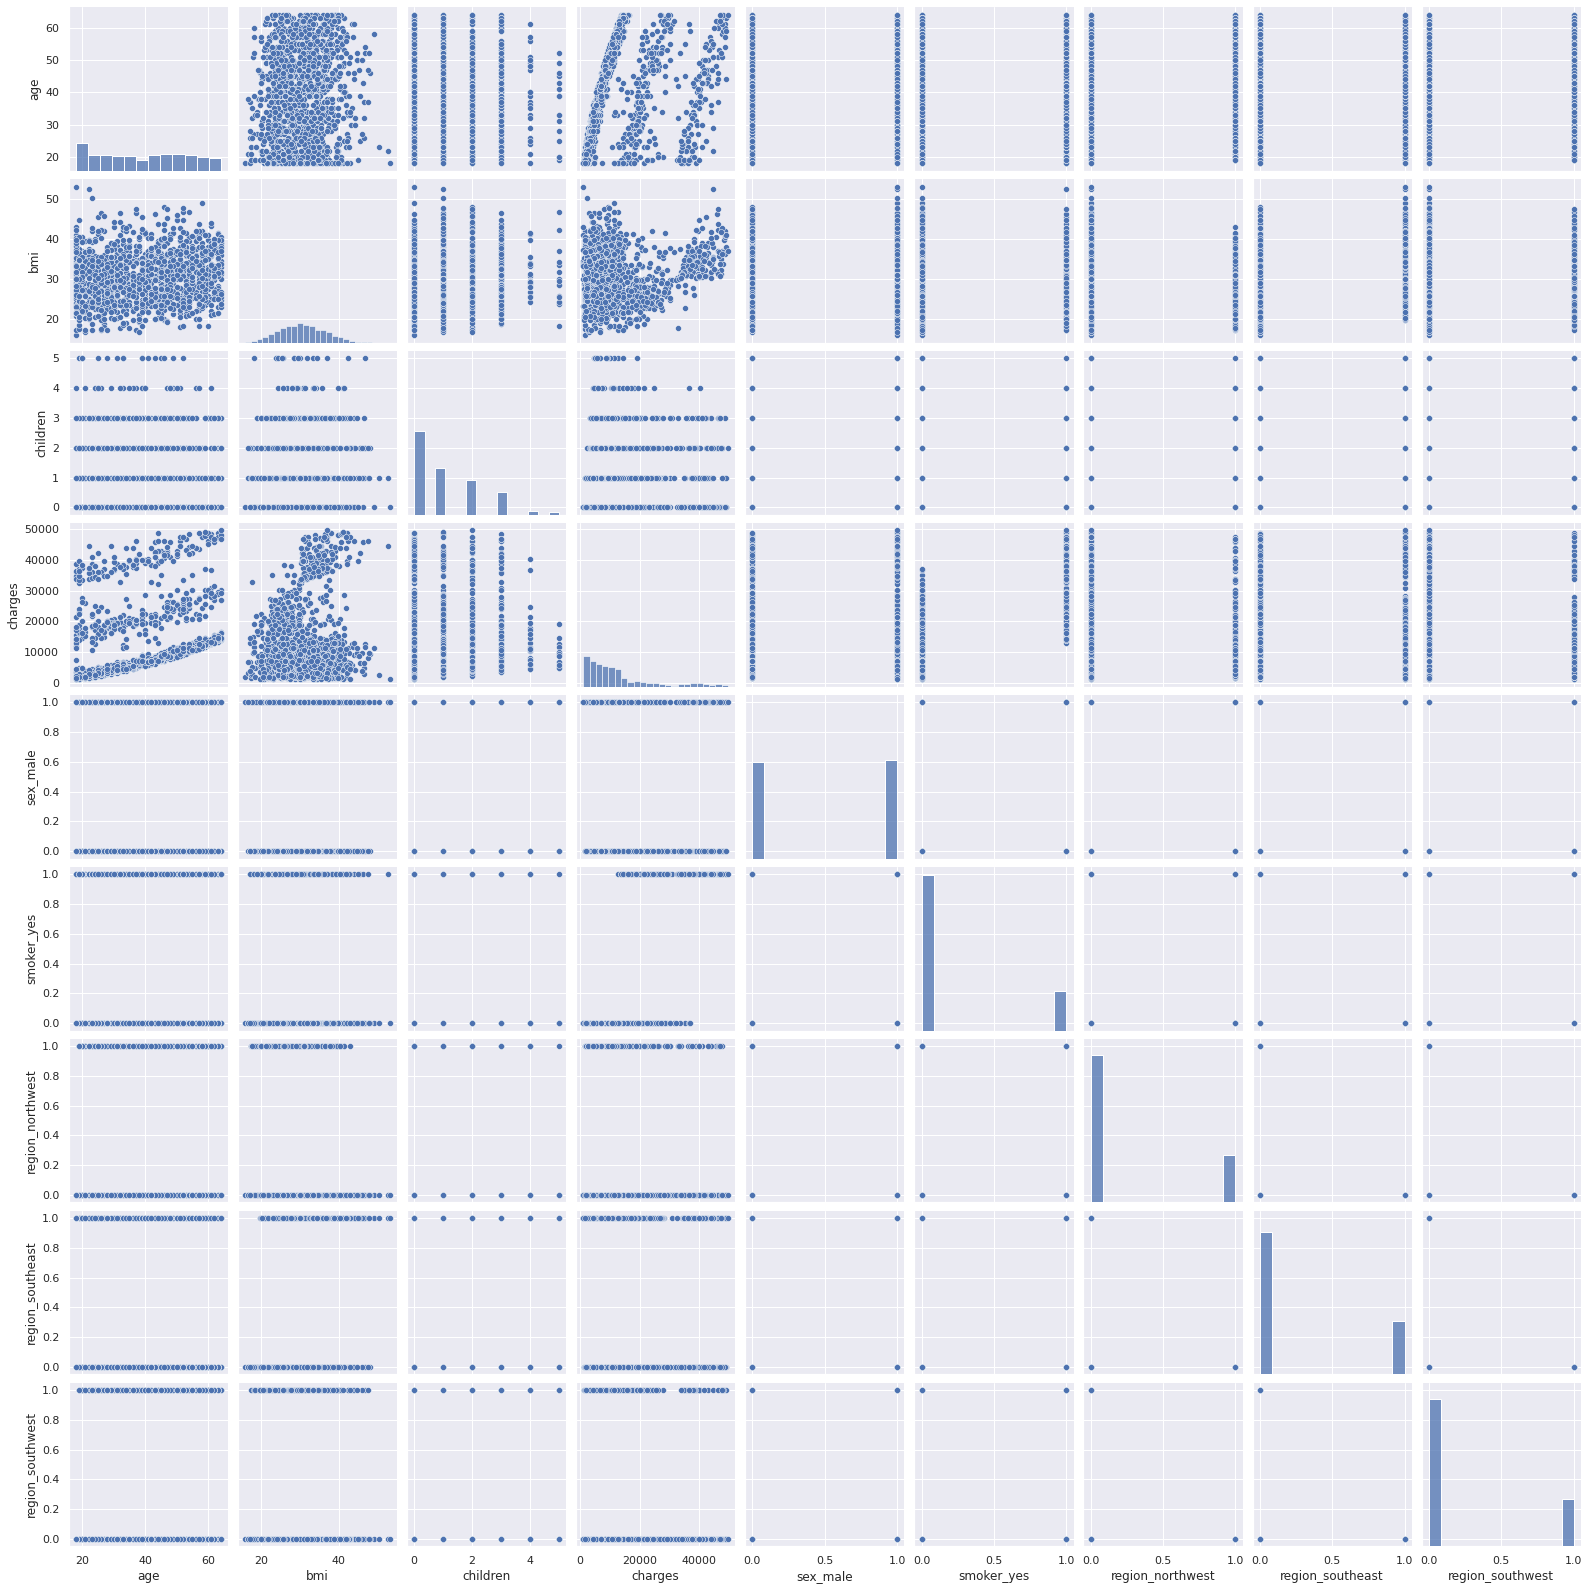

In [30]:
sns.pairplot(df, height=2.5)
plt.show()

## Creando modelos 
Primero se usará un modelo con todas las variables.

In [40]:
y_cols = ['charges']
x_cols = list(set(df.columns)-set(y_cols))

X = df[x_cols].values
y = df[y_cols].values

X_train, X_test, y_train, y_test = train_test_split(X, y) # Se asume una division por 75% y 25%
# Estandarizacion de la entrada y la salida (entrenamiento del objeto estandarizador)
sc_x = StandardScaler().fit(X) 
sc_y = StandardScaler().fit(y)

# Transformacion de las variables
X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

# Creacion del modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Prediccion
y_pred = model.predict(X_test)

## Funciones de métricas
El siguiente punto es calcular las métricas del modelo.

In [41]:
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print('r2:', r2.round(4))
print('mse:', mse.round(4))

r2: 0.7448
mse: 0.2878


El siguiente código muestra un resumen general de los resultados.

In [42]:
model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [43]:
y_test = y_test.reshape(-1)
print("=============Summary==============")
stats.summary(model, X_test, y_test, x_cols)

=============Summary==============
Residuals:
   Min      1Q  Median     3Q    Max
-2.091 -0.1637  0.0676 0.2133 0.9457


Coefficients:
                  Estimate  Std. Error  t value   p value
_intercept       -0.010426    0.029537  -0.3530  0.724314
bmi               0.152387    0.031494   4.8386  0.000002
smoker_yes        0.787290    0.027744  28.3773  0.000000
region_southeast -0.035024    0.035500  -0.9866  0.324565
region_southwest -0.050288    0.034930  -1.4397  0.150906
children          0.059834    0.030882   1.9375  0.053529
sex_male         -0.011829    0.029701  -0.3983  0.690677
age               0.303610    0.029491  10.2949  0.000000
region_northwest -0.035561    0.034402  -1.0337  0.302037
---
R-squared:  0.74483,    Adjusted R-squared:  0.73853
F-statistic: 118.22 on 8 features


Finalmente tenemos la función que calcula los residuales. Es importante notar que es una simple resta entre los valores reales y los predichos.

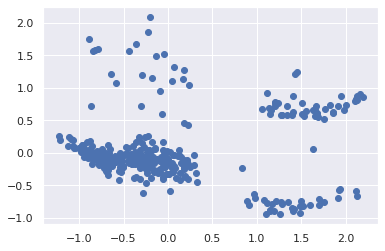

In [44]:

residuales = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuales)
plt.show()

Se puede ver que para valores entre -1 y 0 los valores estan muy cerca a la prediccion pero con algunos que se alejan al lado positivo. Por otro lado a mayor valor la realidad esta a ambos lados pero de manera no muy alejada.

## Segundo modelo
Estos resultados de arriba son buenos, pero se pueden mejorar. Intentaremos hacer algunas transformaciones sobre las variables que pueden ser de utilidad.

Analizando el segundo modelo